In [1]:
%%capture
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from keras.utils import np_utils
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.optimizers import SGD
from keras.models import Sequential
from time import time
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from keras.callbacks import Callback
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

import numpy as np
import pandas as pd
import matplotlib, os, math

os.environ["CUDA_VISIBLE_DEVICES"]="1"

### 1.Prepare data

In [2]:
from time import time
import numpy as np

start_time = time()

print('Loading X_train...')
X_train = np.load('/home/zxt/data/21_category/224/2k/X_train.npy')


end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading X_train...
Running time: 17.575550079345703 seconds


In [3]:
len(X_train)

33600

In [4]:
from time import time
import numpy as np

start_time = time()

print('Loading X_validate...')
X_validate = np.load('/home/zxt/data/21_category/224/2k/X_validate.npy')

print('Loading X_test...')
X_test = np.load('/home/zxt/data/21_category/224/2k/X_test.npy')

print('Loading labels...')
Y_train = np.load('/home/zxt/data/21_category/224/2k/Y_train.npy')
Y_validate = np.load('/home/zxt/data/21_category/224/2k/Y_validate.npy')
Y_test = np.load('/home/zxt/data/21_category/224/2k/Y_test.npy')

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading X_validate...
Loading X_test...
Loading labels...
Running time: 4.429711580276489 seconds


In [5]:
# X_validate = np.vstack((X_validate_part1, X_validate_part2))

In [6]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_validate.shape[0], 'validate samples')
print(X_test.shape[0], 'test samples')

X_train shape: (33600, 224, 224, 3)
33600 train samples
4200 validate samples
4200 test samples


In [7]:
X_train /=255.
X_validate /=  255.
X_test /= 255.

In [8]:

# Y_train label
for i in Y_train:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
        
for i in Y_validate:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20

for i in Y_test:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20

In [9]:
# one-hot encoder[only accpet int]
y_train=np_utils.to_categorical(Y_train,21)
y_validate=np_utils.to_categorical(Y_validate,21)
y_test=np_utils.to_categorical(Y_test,21)

In [10]:
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### 2.Model structure

In [23]:
def alexnet_s(input_shape, n_classes):
    input = Input(input_shape)
  
    # actually batch normalization didn't exist back then
    # they used LRN (Local Response Normalization) for regularization
    x = Conv2D(96, 11, strides=4, padding='same', activation='relu')(input)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Conv2D(256, 5, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
    x = Conv2D(384, 3, strides=1, padding='same', activation='relu')(x)
  
    x = Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPool2D(3, strides=2)(x)
  
    x = Flatten()(x)
  
    x = Dense(4096, activation='relu')(x)

    x = Dense(4096, activation='relu')(x)
    
    #s: add two more layers to train
    x = Dropout(0.4)(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(4096, activation='relu')(x)
  
    output = Dense(n_classes, activation='softmax')(x)
  
    model = Model(input, output)
    return model

In [24]:
# prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [25]:
from keras.callbacks import Callback
class Metrics(Callback):

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        X_val, y_val = self.validation_data[:2]
        y_pred = self.model.predict(X_val)

        y_pred_cat = keras.utils.to_categorical(
            y_pred.argmax(axis=1),
            num_classes=num_classes
        )

        _val_f1 = f1_score(y_val, y_pred_cat, average='macro')
        _val_recall = recall_score(y_val, y_pred_cat, average='macro')
        _val_precision = precision_score(y_val, y_pred_cat, average='macro')

        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)

        print((f"val_f1: {_val_f1:.4f}"
               f" - val_precision: {_val_precision:.4f}"
               f" - val_recall: {_val_recall:.4f}"))

        return

### 3. Data Augmentation

In [17]:
# Data augmentation

image_datagen = ImageDataGenerator(
    rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
    shear_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True,
    fill_mode="nearest")

image_datagen.fit(X_train, augment=True)

In [22]:
X_train.shape

(33600, 224, 224, 3)

### 4.Modeling

In [26]:
num_train_samples = len(Y_train)
num_val_samples = len(Y_validate)
batch_size = 128
epochs = 30
n_classes = 21
input_shape = 224,224,3

learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [27]:
K.clear_session()
# model = alexnet(input_shape, n_classes)
model=None
model = alexnet_s(input_shape,n_classes)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 96)        384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0   

In [28]:
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [29]:
num_classes = 21
f1_metrics = Metrics()

In [61]:
# Data augmentation

image_datagen = ImageDataGenerator(
    rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
    shear_range=0.1,
#     zoom_range=0.2,
#     horizontal_flip=True,
    fill_mode="nearest")

image_datagen.fit(X_train, augment=True)

MemoryError: Unable to allocate 18.8 GiB for an array with shape (33600, 224, 224, 3) and data type float32

In [30]:
start_time = time()
print('Training model...')


hist = model.fit(
    X_train, 
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping,f1_metrics],
    validation_data = (X_validate,y_validate))

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Training model...
Train on 33600 samples, validate on 4200 samples
Epoch 1/30
33600/33600 [==============================] - 162s 5ms/step - loss: 1.9213 - accuracy: 0.3520 - val_loss: 1.9665 - val_accuracy: 0.3467
val_f1: 0.2960 - val_precision: 0.4224 - val_recall: 0.3447
Epoch 2/30
33600/33600 [==============================] - 159s 5ms/step - loss: 1.4024 - accuracy: 0.5041 - val_loss: 2.2497 - val_accuracy: 0.3226
val_f1: 0.2881 - val_precision: 0.4279 - val_recall: 0.3265
Epoch 3/30
33600/33600 [==============================] - 160s 5ms/step - loss: 1.1788 - accuracy: 0.5882 - val_loss: 1.7132 - val_accuracy: 0.4500
val_f1: 0.4078 - val_precision: 0.5239 - val_recall: 0.4463
Epoch 4/30
33600/33600 [==============================] - 159s 5ms/step - loss: 1.0381 - accuracy: 0.6376 - val_loss: 1.0495 - val_accuracy: 0.6345
val_f1: 0.6222 - val_precision: 0.6443 - val_recall: 0.6308
Epoch 5/30
33600/33600 [==============================] - 159s 5ms/step - loss: 0.9145 - accuracy: 0.

In [30]:
# parallel_model.save('/home/zxt/data/model/alex_basic_5k_224.h5')

In [57]:
model.save('/home/zxt/data/model/pre_final/alexnet_s_aug_lr_2k_224_model.h5')

In [58]:
model.save_weights('/home/zxt/data/model/pre_final/alexnet_s_aug_lr_2k_224_modelweights.h5')

### 4.Evaluation

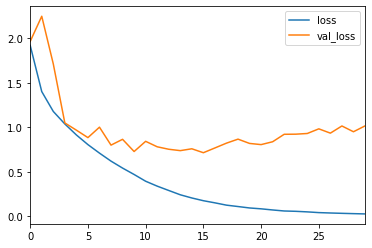

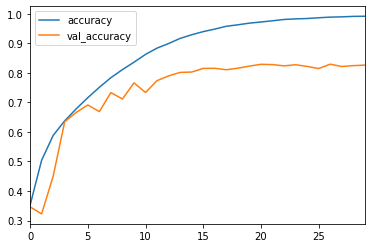

In [32]:
history_df = pd.DataFrame(hist.history)
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()

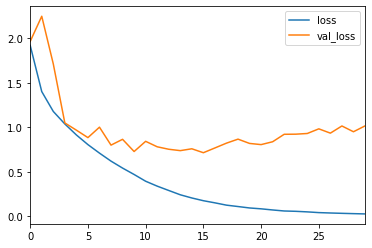

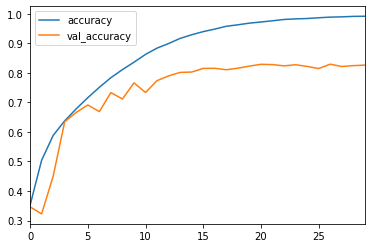

In [33]:
# 50 epoch 0.4 0.4 0.5 0.5
history_df = pd.DataFrame(hist.history)
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()

### 5.Prediction on X_test dataset

In [34]:
loss,accuracy = model.evaluate(X_test,y_test)
print('\ntest loss',loss)
print('accuracy',accuracy)

4200/4200 [==============================] - 13s 3ms/step

test loss 1.0198497192632585
accuracy 0.8223809599876404


In [96]:
y_pred = model.predict(X_test,batch_size=1)

In [97]:
y_pred

array([[3.78040698e-12, 7.49338511e-08, 4.27519551e-14, ...,
        1.77665662e-12, 9.99998093e-01, 4.28689750e-10],
       [3.16912468e-10, 8.98658072e-07, 3.50001672e-09, ...,
        3.65600243e-08, 2.25727263e-06, 1.09772023e-03],
       [5.02814543e-12, 1.04580656e-12, 2.09564218e-13, ...,
        3.31777547e-13, 8.65537743e-07, 2.95608054e-08],
       ...,
       [9.45886143e-08, 4.44565492e-04, 1.33693973e-10, ...,
        6.07643713e-08, 1.66907504e-01, 2.22583812e-10],
       [3.03537069e-14, 7.70829797e-01, 8.21182532e-13, ...,
        3.85974629e-12, 7.05436709e-10, 2.80322770e-12],
       [7.79408926e-10, 1.31714675e-08, 1.30883793e-11, ...,
        6.41603506e-11, 2.94592772e-09, 9.98352766e-01]], dtype=float32)

In [98]:
len(y_pred)

4200

### 6.Check each categoryaccuracy

In [42]:
a = list(y_pred)
y_prediction=[]
for i in a:
    j =list(i)
    y_prediction.append(j.index(max(j)))

In [43]:
y_prediction[:5]

[19, 12, 7, 12, 10]

In [44]:
Y_test[:5]

array([['19'],
       ['12'],
       ['7'],
       ['12'],
       ['0']], dtype='<U16')

In [45]:
# array to dataframe
y_real=pd.DataFrame(Y_test,columns=['label'])

In [46]:
y_real.head(2)

,label
0,19
1,12


In [47]:
y_predict = pd.DataFrame(y_prediction,columns=['label_pre'])

In [48]:

y_predict.head(2)

,label_pre
0,19
1,12


In [49]:
prediction_df = pd.concat([y_real,y_predict],axis=1)
prediction_df['label']=prediction_df['label'].astype(int)
prediction_df['diff']=prediction_df['label']-prediction_df['label_pre']


In [50]:
prediction_df

,label,label_pre,diff
0,19,19,0
1,12,12,0
2,7,7,0
3,12,12,0
4,0,10,-10
...,...,...,...
4195,9,9,0
4196,10,10,0
4197,17,17,0
4198,15,1,14


In [51]:
prediction_df.to_csv(r'/home/zxt/data/results/prediction_df.csv',index=False)

In [52]:
onehot_keylist = ['elephant','wild_boar','gazellethomosons','squirrel','hedgehog','guineafowl','moose','coyote','bird',
                  'fox','giraffe','buffalo','hare','vehicle','wildebeest','cattle','skunk','lion','zebra','black_bear',
                  'racoon']
onehot_dict = {'elephant':0,'wild_boar':1,'gazellethomosons':2,'squirrel':3,'hedgehog':4,'guineafowl':5,'moose':6,'coyote':7,
              'bird':8,'fox':9,'giraffe':10,'buffalo':11,'hare':12,'vehicle':13,'wildebeest':14,'cattle':15,'skunk':16,'lion':17,
              'zebra':18,'black_bear':19,'racoon':20}

for animal in onehot_keylist:
    name = animal
    animal = prediction_df[prediction_df['label']== onehot_dict[animal]]
    acc = animal.loc[:,'diff'].value_counts()[0]/len(animal)
    print("%s acc: %10.3f" %(name,acc) )

elephant acc:      0.662
wild_boar acc:      0.692
gazellethomosons acc:      0.905
squirrel acc:      0.889
hedgehog acc:      0.917
guineafowl acc:      0.879
moose acc:      0.968
coyote acc:      0.760
bird acc:      0.892
fox acc:      0.807
giraffe acc:      0.821
buffalo acc:      0.761
hare acc:      0.920
vehicle acc:      0.854
wildebeest acc:      0.695
cattle acc:      0.560
skunk acc:      0.847
lion acc:      0.744
zebra acc:      0.790
black_bear acc:      0.808
racoon acc:      0.982
